Logical error rate: 0.0581


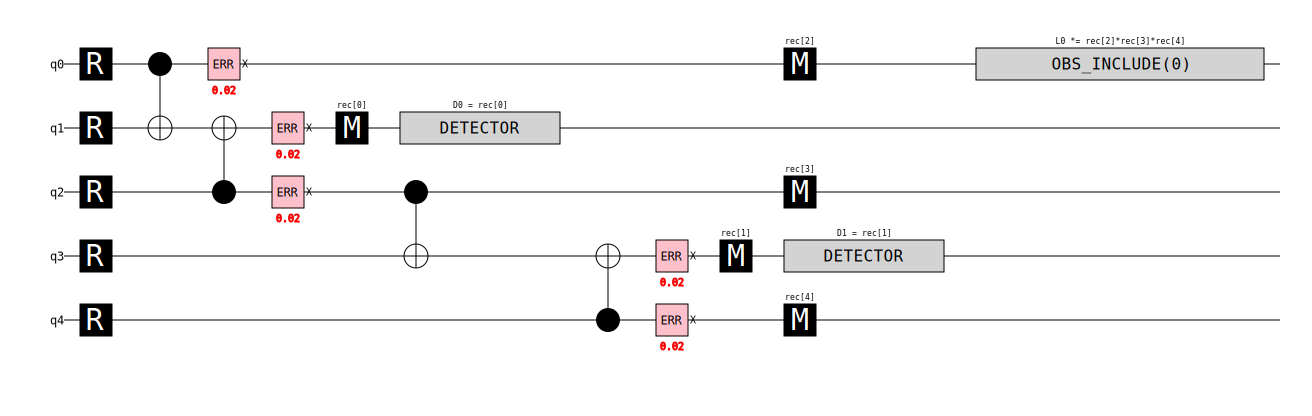

In [ ]:
import stim
import pymatching as pm
import numpy as np
from IPython.display import SVG

# Distance-3 repetition code with bit-flip (X) errors
circuit = stim.Circuit('''
# Reset data + ancillas
R 0 1 2 3 4

# Data: q0, q2, q4
# Ancillas: q1, q3

# Parity check 1: q1 measures q0 ⊕ q2
CNOT 0 1
CNOT 2 1
X_ERROR(0.02) 0 1 2

M 1
DETECTOR rec[-1]

# Parity check 2: q3 measures q2 ⊕ q4
CNOT 2 3
CNOT 4 3
X_ERROR(0.02) 3 4

M 3
DETECTOR rec[-1]

# Measure logical Z (majority vote of q0,q2,q4)
M 0 2 4
OBSERVABLE_INCLUDE(0) rec[-3] rec[-2] rec[-1]
''')

# Detector error model
dem = circuit.detector_error_model()
matcher = pm.Matching.from_detector_error_model(dem)

# Run sampler
sampler = circuit.compile_detector_sampler()
dets, obs = sampler.sample(10_000, separate_observables=True)

# Decode
pred = matcher.decode_batch(dets).reshape(-1, 1)
p_L = np.count_nonzero(pred ^ obs) / len(pred)

print("Logical error rate:", p_L)

# Show circuit diagram as SVG
SVG(str(circuit.diagram("timeline")))
